In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00


In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import adjusted_rand_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from catboost import Pool

In [317]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [289]:
train_df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [290]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  70265 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  95104 non-null   float64
 9   g_lift      70008 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [291]:
train_df.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,100000.000000,70265.000000,100000.000000,100000.00000,100000.000000,100000.000000,95104.000000,70008.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,1.000000e+05
mean,49999.500000,334.479290,0.529837,5.267680,52.25343,2.118680,0.396740,22.154431,0.500986,2.470910,...,0.004360,0.001430,0.000940,0.007910,0.007890,0.00218,0.000320,0.001210,0.00021,5.138396e+06
std,28867.657797,194.004755,0.573645,3.905558,17.79250,0.829688,0.547632,8.286241,0.500003,1.944981,...,0.065887,0.037788,0.030645,0.088586,0.088475,0.04664,0.017886,0.034764,0.01449,4.187469e+06
min,0.000000,0.000000,0.000000,1.000000,29.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.480000e+05
25%,24999.750000,167.000000,0.000000,2.000000,40.00000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.644000e+06
50%,49999.500000,334.000000,0.000000,4.000000,52.00000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,4.090000e+06
75%,74999.250000,501.000000,1.000000,7.000000,60.00000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,6.281000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.00000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,8.054800e+07


In [292]:
test_df.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
count,100000.000000,100000.000000,69980.000000,100000.000000,100000.000000,100000.000000,100000.000000,94883.000000,70186.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,149999.500000,334.758430,0.532452,5.253820,52.278760,2.116690,0.397860,22.081353,0.499701,2.464950,...,0.006230,0.004500,0.001860,0.000770,0.00813,0.007800,0.001630,0.000190,0.001460,0.000190
std,28867.657797,193.831614,0.574559,3.900709,17.906689,0.829795,0.548662,8.300805,0.500003,1.947041,...,0.078684,0.066931,0.043088,0.027738,0.08980,0.087973,0.040341,0.013783,0.038182,0.013783
min,100000.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124999.750000,166.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149999.500000,334.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,174999.250000,502.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,199999.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Очистка данных и генерация признаков

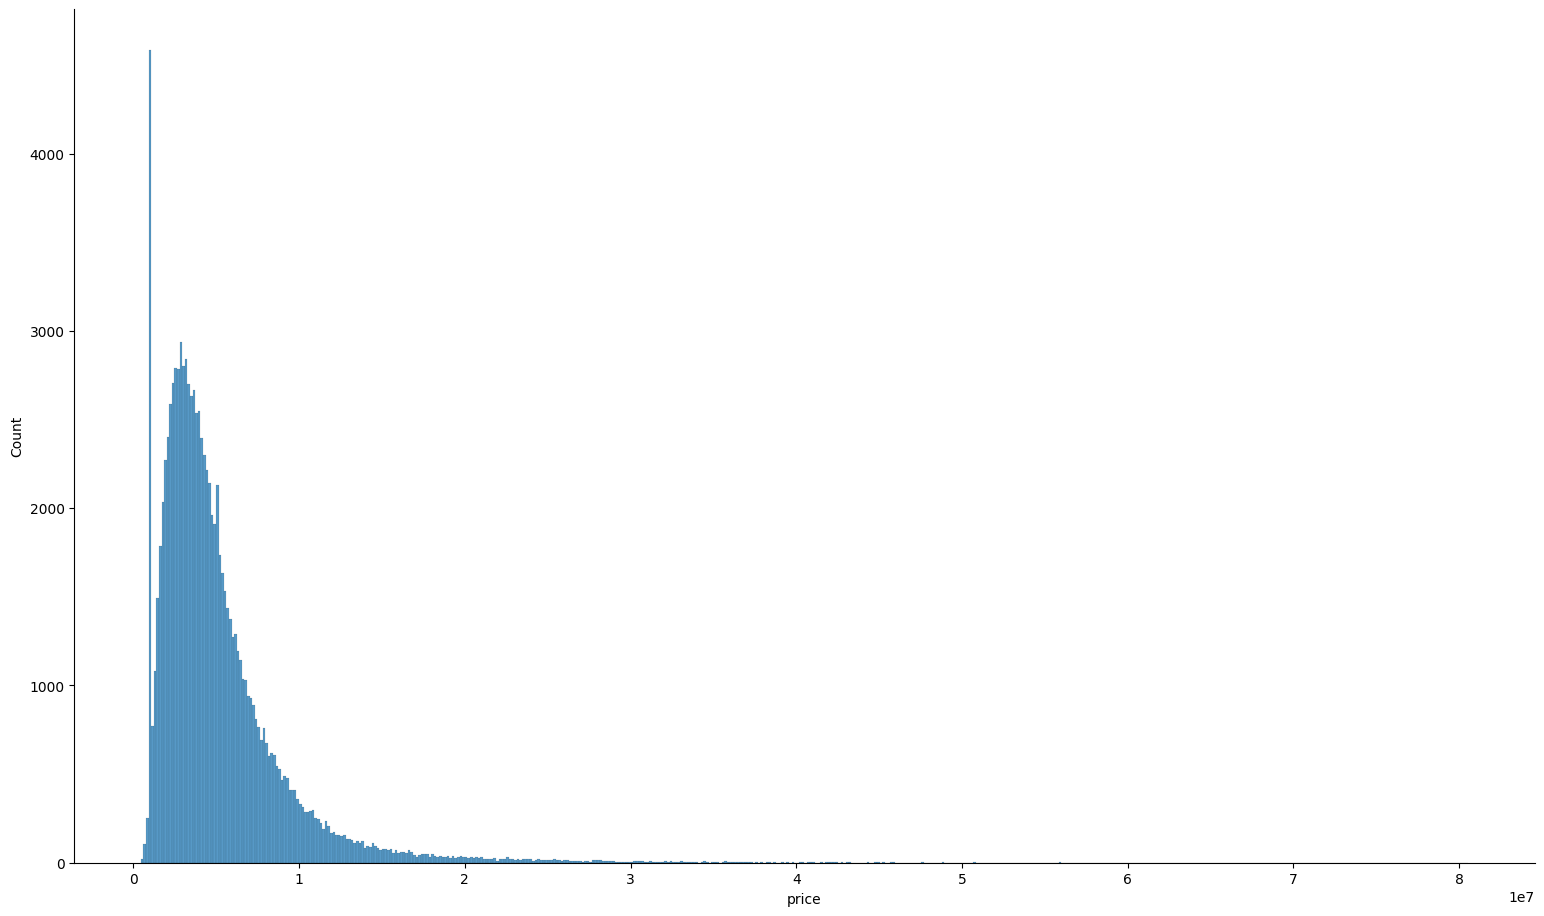

In [293]:
sns.displot(train_df.price).figure.set_size_inches(18, 10)

Видим выброс в виде большого кол-ва обьектов с одной ценной.

In [294]:
train_df.price.value_counts()

1000000     4079
2935000       36
2802000       35
3200000       34
2667000       31
            ... 
33503000       1
15319000       1
13008000       1
33233000       1
20835000       1
Name: price, Length: 15007, dtype: int64

In [295]:
train_df[train_df.price == 1_000_000].describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,4079.000000,4079.000000,2880.000000,4079.000000,4079.000000,4079.000000,4079.000000,3888.000000,2845.000000,4079.000000,...,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.000000,4079.0
mean,49834.346163,331.845060,0.516319,5.333905,52.497181,2.118902,0.396666,22.033179,0.490685,2.469233,...,0.004658,0.002206,0.000735,0.007600,0.007845,0.002697,0.000245,0.001716,0.000245,1000000.0
std,29069.121826,195.569166,0.565057,4.001325,18.614937,0.832360,0.548348,8.341390,0.500001,1.955105,...,0.068099,0.046926,0.027113,0.086856,0.088235,0.051866,0.015658,0.041395,0.015658,0.0
min,28.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
25%,24101.500000,161.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
50%,49744.000000,333.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
75%,75149.000000,500.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0
max,99905.000000,671.000000,2.000000,25.000000,215.000000,6.000000,2.000000,30.000000,1.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000000.0


Видим что признаки довольно разные и с большим разбросом. Значит скорее всего это выбросы выбросами. И их лучше удалить

In [318]:
train_df.drop(train_df.index[train_df.price == 1000000], inplace=True)

Также возможно стоит удалить крайние слишком высокие и низкие значения

In [297]:
percentile_99 = train_df.price.quantile(0.99)

percentile_1 = train_df.price.quantile(0.01)

print(f"99-й перцентиль: {percentile_99}")
print(f"1-й перцентиль: {percentile_1}")

99-й перцентиль: 22601200.00000004
1-й перцентиль: 1090200.0


In [319]:
train_df.drop(train_df.index[train_df.price > 23_000_000], inplace=True)

train_df.drop(train_df.index[train_df.price < 1_000_000], inplace=True)

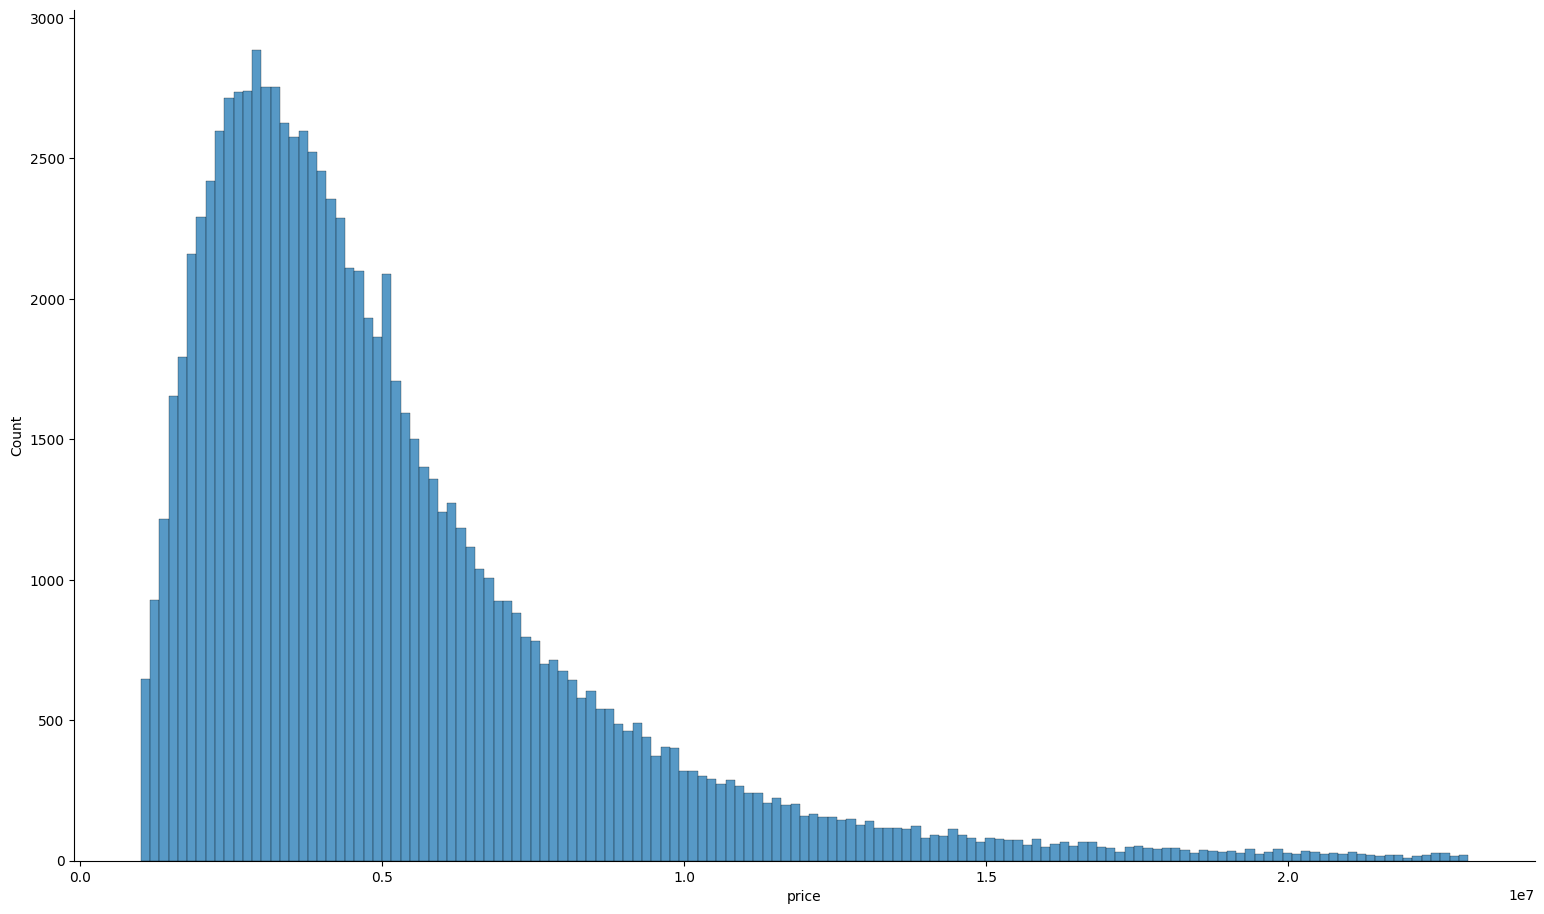

In [320]:
sns.displot(train_df.price).figure.set_size_inches(18, 10)

In [321]:
y = train_df["price"]

In [322]:
train_df.corr().style.background_gradient()

<ipython-input-322-771569491a8e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr().style.background_gradient()


,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
id,1.000000,0.002132,-0.006870,-0.001945,-0.007843,-0.006348,-0.005787,0.005576,-0.006386,-0.002518,0.001137,0.007750,-0.004922,0.004329,0.002167,-0.000665,-0.001192,-0.006529,0.000442,0.001085,-0.000238,0.001777,0.001262,0.064256
street_id,0.002132,1.000000,-0.013098,-0.008050,-0.013294,0.004440,-0.008167,0.007966,-0.004667,0.007473,-0.001731,0.001661,0.000041,0.003073,0.005676,-0.007379,-0.001003,0.000178,0.007633,-0.004859,0.001138,-0.000746,0.001671,-0.027340
build_tech,-0.006870,-0.013098,1.000000,0.172134,0.313015,0.104181,0.787473,0.021618,0.006987,0.016684,-0.000708,-0.019896,-0.080045,-0.073791,-0.058405,-0.036012,-0.027516,0.074851,0.073863,0.037102,0.012857,0.091239,0.024517,0.401977
floor,-0.001945,-0.008050,0.172134,1.000000,0.149322,-0.014287,0.136260,0.014192,0.002958,-0.002254,-0.001788,-0.036643,-0.048651,-0.004520,0.026058,0.008557,0.070742,-0.053525,0.026858,0.010842,0.001853,0.065952,0.002098,0.226063
area,-0.007843,-0.013294,0.313015,0.149322,1.000000,0.803835,0.248425,0.019559,0.004040,0.157143,-0.000111,-0.045633,-0.043180,-0.019278,-0.014467,0.015123,0.008160,0.005225,-0.001034,0.087416,0.051454,0.024666,0.025838,0.608764
rooms,-0.006348,0.004440,0.104181,-0.014287,0.803835,1.000000,0.082549,0.011807,0.001813,0.204358,0.000418,0.001496,-0.009841,-0.009234,-0.004940,-0.002250,-0.006668,0.015477,0.006765,0.017137,0.014324,-0.008006,0.002668,0.347558
balcon,-0.005787,-0.008167,0.787473,0.136260,0.248425,0.082549,1.000000,0.017348,0.008634,0.012964,0.002585,-0.019509,-0.061740,-0.058084,-0.048174,-0.027267,-0.022465,0.056598,0.059145,0.031215,0.012584,0.061360,0.032676,0.318383
metro_dist,0.005576,0.007966,0.021618,0.014192,0.019559,0.011807,0.017348,1.000000,-0.000850,0.011221,0.004208,0.000730,-0.004769,0.003770,0.000410,0.004722,-0.001965,0.003726,0.001202,-0.002397,-0.001100,0.001868,0.000533,-0.105887
g_lift,-0.006386,-0.004667,0.006987,0.002958,0.004040,0.001813,0.008634,-0.000850,1.000000,0.003315,0.000655,-0.010526,-0.007009,-0.004861,-0.001836,-0.006240,-0.000098,0.000046,-0.002951,0.001232,-0.005554,-0.005334,-0.002786,0.006617
n_photos,-0.002518,0.007473,0.016684,-0.002254,0.157143,0.204358,0.012964,0.011221,0.003315,1.000000,0.038041,-0.009750,0.001512,0.006627,0.006417,0.003038,0.005086,0.009420,0.009094,-0.004924,0.002953,0.003603,-0.002469,0.192267


Видим сильную корреляцию между ценой и площадью, можно создать дополнительный признак в виде цены за метр квадратный. Но чтобы использовать это для теста мы можем брать среднюю цену за квадрытный метр на улице. Также интуитивно и по практическим знаниям понятно, что время года влияет на цену. Также цена обычно всегда растет со временем, сгененируем категориальный признак 'months' и числовой 'mohth_from_begin' из признака 'date', а от кода оставим две последние цифры

In [323]:
train_df['price_per_sqm'] = train_df['price'] / train_df['area']

In [324]:
average_price_per_sqm_by_street = train_df.groupby('street_id')['price_per_sqm'].mean().reset_index()

# создадим словарь для теста
street_price_dict = dict(zip(average_price_per_sqm_by_street['street_id'], average_price_per_sqm_by_street['price_per_sqm']))

In [325]:
train_df['avg_price_per_sqm'] = train_df['street_id'].map(street_price_dict)

test_df['avg_price_per_sqm'] = test_df['street_id'].map(street_price_dict)

In [327]:
del train_df['price_per_sqm']

In [328]:
train_df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,avg_price_per_sqm
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,4510000,91369.606841
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,13231000,231292.693311
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,2008000,67971.250541
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,12680000,285035.354338
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,3335000,106264.184060


In [329]:
train_df["months"] = train_df["date"].apply(lambda x: int(x.split('-')[-1]))

test_df["months"] = test_df["date"].apply(lambda x: int(x.split('-')[-1]))

In [330]:
train_df['year'] = pd.DatetimeIndex(train_df["date"]).year - 2011
train_df['mohth_from_begin'] = train_df["year"] * 12 + pd.DatetimeIndex(train_df["date"]).month

test_df['year'] = pd.DatetimeIndex(test_df.date).year - 2011
test_df['mohth_from_begin'] = test_df["year"] * 12 + pd.DatetimeIndex(test_df["date"]).month

In [333]:
train_df["date"] = train_df["date"].apply(lambda x: int(x[2:4]))

test_df["date"] = test_df["date"].apply(lambda x: int(x[2:4]))

In [331]:
del train_df['year'], test_df['year']

In [334]:
train_df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw8,kw9,kw10,kw11,kw12,kw13,price,avg_price_per_sqm,months,mohth_from_begin
0,0,11,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,4510000,91369.606841,1,1
1,1,11,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,13231000,231292.693311,1,1
2,2,11,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,2008000,67971.250541,1,1
3,3,11,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,12680000,285035.354338,1,1
4,4,11,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,3335000,106264.184060,1,1


In [335]:
train_df.corr().style.background_gradient()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,kw2,kw3,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price,avg_price_per_sqm,months,mohth_from_begin
id,1.000000,0.815628,0.002132,-0.006870,-0.001945,-0.007843,-0.006348,-0.005787,0.005576,-0.006386,-0.002518,0.001137,0.007750,-0.004922,0.004329,0.002167,-0.000665,-0.001192,-0.006529,0.000442,0.001085,-0.000238,0.001777,0.001262,0.064256,-0.009763,0.016804,0.681674
date,0.815628,1.000000,-0.001606,-0.005784,-0.002054,-0.010290,-0.004317,-0.003993,0.004677,-0.002689,-0.001302,-0.000546,0.013798,-0.003383,0.006526,0.001887,-0.005668,-0.002327,-0.008384,-0.000331,-0.000721,-0.003567,0.002067,0.006192,0.075216,-0.011056,0.003419,0.826081
street_id,0.002132,-0.001606,1.000000,-0.013098,-0.008050,-0.013294,0.004440,-0.008167,0.007966,-0.004667,0.007473,-0.001731,0.001661,0.000041,0.003073,0.005676,-0.007379,-0.001003,0.000178,0.007633,-0.004859,0.001138,-0.000746,0.001671,-0.027340,-0.033143,0.007071,0.002661
build_tech,-0.006870,-0.005784,-0.013098,1.000000,0.172134,0.313015,0.104181,0.787473,0.021618,0.006987,0.016684,-0.000708,-0.019896,-0.080045,-0.073791,-0.058405,-0.036012,-0.027516,0.074851,0.073863,0.037102,0.012857,0.091239,0.024517,0.401977,0.014615,-0.004338,-0.007210
floor,-0.001945,-0.002054,-0.008050,0.172134,1.000000,0.149322,-0.014287,0.136260,0.014192,0.002958,-0.002254,-0.001788,-0.036643,-0.048651,-0.004520,0.026058,0.008557,0.070742,-0.053525,0.026858,0.010842,0.001853,0.065952,0.002098,0.226063,0.060510,0.005541,0.001430
area,-0.007843,-0.010290,-0.013294,0.313015,0.149322,1.000000,0.803835,0.248425,0.019559,0.004040,0.157143,-0.000111,-0.045633,-0.043180,-0.019278,-0.014467,0.015123,0.008160,0.005225,-0.001034,0.087416,0.051454,0.024666,0.025838,0.608764,0.012075,-0.004386,-0.010952
rooms,-0.006348,-0.004317,0.004440,0.104181,-0.014287,0.803835,1.000000,0.082549,0.011807,0.001813,0.204358,0.000418,0.001496,-0.009841,-0.009234,-0.004940,-0.002250,-0.006668,0.015477,0.006765,0.017137,0.014324,-0.008006,0.002668,0.347558,-0.028557,-0.000964,-0.004101
balcon,-0.005787,-0.003993,-0.008167,0.787473,0.136260,0.248425,0.082549,1.000000,0.017348,0.008634,0.012964,0.002585,-0.019509,-0.061740,-0.058084,-0.048174,-0.027267,-0.022465,0.056598,0.059145,0.031215,0.012584,0.061360,0.032676,0.318383,0.010828,-0.004268,-0.005696
metro_dist,0.005576,0.004677,0.007966,0.021618,0.014192,0.019559,0.011807,0.017348,1.000000,-0.000850,0.011221,0.004208,0.000730,-0.004769,0.003770,0.000410,0.004722,-0.001965,0.003726,0.001202,-0.002397,-0.001100,0.001868,0.000533,-0.105887,-0.048539,-0.000467,0.003594
g_lift,-0.006386,-0.002689,-0.004667,0.006987,0.002958,0.004040,0.001813,0.008634,-0.000850,1.000000,0.003315,0.000655,-0.010526,-0.007009,-0.004861,-0.001836,-0.006240,-0.000098,0.000046,-0.002951,0.001232,-0.005554,-0.005334,-0.002786,0.006617,0.001394,0.000383,-0.001997


Мы действительно видим ещё более сильную корреляцию между средней ценой на улице, а также видим корреляцию между месяцем и количеством месяцев с начала

Удалим 'id' и 'price' из трейна

In [336]:
train_df.drop(columns=["id", "price"], inplace=True)

test_df.drop(columns=["id"], inplace=True)

In [337]:
train_df.describe()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw7,kw8,kw9,kw10,kw11,kw12,kw13,avg_price_per_sqm,months,mohth_from_begin
count,94402.000000,94402.000000,66300.000000,94402.000000,94402.000000,94402.000000,94402.000000,89768.000000,66130.000000,94402.000000,...,94402.000000,94402.000000,94402.000000,94402.000000,94402.000000,94402.000000,94402.000000,94402.000000,94402.000000,94402.000000
mean,11.331984,334.316476,0.526983,5.257336,51.580909,2.108091,0.394314,22.146366,0.501633,2.463560,...,0.000964,0.008051,0.008019,0.001960,0.000275,0.001176,0.000148,96666.883994,6.510392,10.494206
std,0.470928,193.945949,0.571588,3.896794,15.482757,0.810696,0.545220,8.289777,0.500001,1.933988,...,0.031033,0.089364,0.089189,0.044225,0.016594,0.034270,0.012177,40241.019813,3.864228,6.856888
min,11.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28227.745604,1.000000,1.000000
25%,11.000000,166.250000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67738.486973,3.000000,5.000000
50%,11.000000,333.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87141.205333,7.000000,9.000000
75%,12.000000,501.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118991.129256,10.000000,14.000000
max,12.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,314376.645443,12.000000,24.000000


В  "g_lift" много пропусков с слабая корреляция, так как не понятно как восстанавливать, то лучше удалить

In [338]:
del train_df["g_lift"]
del test_df["g_lift"]

### Заполнение пропусков

в целом расстояние до метро не сильно коррелирует с ценой и скорее всего этот признак распределен нормально, можем заменить на среднее.

In [339]:
train_df["metro_dist"] = train_df["metro_dist"].fillna(train_df["metro_dist"].mean())
test_df["metro_dist"] = test_df["metro_dist"].fillna(test_df["metro_dist"].mean())

Вот 'build_tech' категориальный и не понятно чем заполнить пропуски, также он неплохо коррелирует, поэтому лучше обучим простую модельку RandomForestClassifier, которая сможет это сделать.

In [341]:
data_bt_train = train_df[train_df["build_tech"].notnull()].drop(columns="build_tech")

target_bt_train = train_df[train_df["build_tech"].notnull()]["build_tech"].astype(int).values

In [342]:
model_for_fill_bt = RandomForestClassifier(n_estimators=100)

In [343]:
model_for_fill_bt.fit(data_bt_train, target_bt_train)

RandomForestClassifier()

In [344]:
adjusted_rand_score(target_bt_train, model_for_fill_bt.predict(data_bt_train))

1.0

получается, возможно, мы идеально восстанавливаем

In [345]:
bt_pred = pd.DataFrame({"build_tech": model_for_fill_bt.predict(train_df.drop(columns="build_tech"))}, index=train_df.index)

In [346]:
train_df.fillna(bt_pred, inplace=True)

In [347]:
bt_test_pred = pd.DataFrame({"build_tech": model_for_fill_bt.predict(test_df.drop(columns="build_tech"))}, index=test_df.index)

In [348]:
test_df.fillna(bt_test_pred, inplace=True)

In [349]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=42)

# CatBoostRegressor

По поводу признаков 'kw..' мы видим довольно слабую кореляцию цены с ними, не уверен, что они вообще нужны, но без них чуть хуже. Со всеми тоже не лучше.
Взял просто самые коррелирующие.

In [352]:
features = ['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist',
                   'kw10', 'kw11', 'kw12', 'date', 'months', 'mohth_from_begin', 'avg_price_per_sqm']
cat_features = ['street_id', 'months']

train_pool = Pool(data=train_df[features], label=y, cat_features=cat_features)

In [353]:
%%time
model = CatBoostRegressor(n_estimators=15000, depth=6, learning_rate=0.05, random_state=42,
                          loss_function='MAE', eval_metric='MAE')

model.fit(train_pool, verbose=False)

CPU times: user 17min 51s, sys: 17.5 s, total: 18min 8s
Wall time: 11min 13s


In [279]:
pred = model.predict(X_test[features])
mae(y_test, pred)

355079.19941845484

In [354]:
#добавил категариальную фичу номер месяца
pred = model.predict(X_test[features])
mae(y_test, pred)

330953.06742288993

In [356]:
pred_df = pd.read_csv("Test.csv")
pred_df["price"] = model.predict(test_df[features])

pred_df[["id", "price"]].to_csv("11_submit_catbost_category.csv", index=False)

!cat 10_submit_catbost_category.csv | head

id,price
100000,8621569.119213402
100001,4839015.8472385835
100002,3997185.376981493
100003,3096879.69087298
100004,7012361.270754243
100005,5045984.600610448
100006,2152849.974211377
100007,1105064.8792278212
100008,3251142.593535208


# LGBMRegressor

In [357]:
LGBM = LGBMRegressor(n_estimators=500, learning_rate=1., max_depth=None)

In [358]:
LGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 725
[LightGBM] [Info] Number of data points in the train set: 75521, number of used features: 24
[LightGBM] [Info] Start training from score 5097569.007296


LGBMRegressor(learning_rate=1.0, max_depth=None, n_estimators=500)

In [359]:
pred = LGBM.predict(X_test)
mae(y_test, pred)

526711.4676510833

In [360]:
pred = LGBM.predict(X_test)
mae(y_test, pred)

526711.4676510833

# XGBRegressor

In [361]:
XG = XGBRegressor(n_estimators=1000,  learning_rate=0.1, max_depth=None)

In [362]:
XG.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [363]:
pred = XG.predict(X_test)
mae(y_test, pred)

396793.02929863357

In [364]:
pred = XG.predict(X_test)
mae(y_test, pred)

396793.02929863357

In [365]:
XG.fit(train_df, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [366]:
mae(y, XG.predict(train_df))

315654.2323712686

In [367]:
xgb_pred = XG.predict(test_df)

In [368]:
pred_df = pd.read_csv("Test.csv")
pred_df["price"] = xgb_pred

pred_df[["id", "price"]].to_csv("12_submit_xgb.csv", index=False)

!cat 12_submit_xgb.csv | head

id,price
100000,8374680.0
100001,4715874.5
100002,4059148.5
100003,3221258.0
100004,7261214.5
100005,5068021.0
100006,2156561.5
100007,1210791.2
100008,3287271.8


Лучше всего оказался CatBoostRegressor, но XGBRegressor был близок. Самый большой выигрыш дала работа со временем и с деньгами, думаю можно ещё значительно улучшить результат, придумав дополнительные фичи с ними.